# EA FIFA 19 Players Stats
## by Faress Eissa

## Data
> Detailed attributes for every player registered in the latest edition of FIFA 19 database. Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

## Introduction
> This is a data visualization project for the dataset on hand to explore various relationships between players qualities and attributes in order to gain insights about what type of players have higher Overall , Value and Wage scores. 

> The project even goes beyond those main features and explores other secondary ones to understands what affects and defines them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load dataset
data= pd.read_csv('data.csv')
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
## Transfer Height column into a single value in cm
Height= data.Height.str.split("'", expand= True)
foot= Height[0].astype('float')
inch= Height[1].astype('float') / 12
data['Height'] = round((foot + inch) * 30.48)

In [4]:
## transfer Weight column into a single value in Kg
data['Weight']= (data.Weight.str.split('l', expand= True)[0]).astype('float')
data['Weight']= round(data.Weight.apply(lambda x: x * 0.453592))


In [5]:
# filling the missing value for the continous variables for proper data visualization
numeric= ['ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
          'LongPassing','BallControl','HeadingAccuracy','Finishing'
          ,'Crossing','Weight','Height','Skill Moves','Weak Foot',
          'Acceleration','SprintSpeed' ,'Agility','Reactions',
          'Balance','ShotPower','Jumping','Stamina' ,'Strength',
          'LongShots' ,'Aggression','Interceptions' ,'Positioning',
          'Vision','Penalties' ,'Composure','Marking' ,
          'StandingTackle','SlidingTackle' ,'GKDiving' ,
          'GKHandling' ,'GKKicking' ,'GKPositioning' ,'GKReflexes']

for c in numeric:
    data[c].fillna(data[c].median(), inplace = True)

# filling other missing values with default entry
data['Body Type'].fillna('Normal', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)

In [6]:
# create several columns inclusive to the mean of corresponding attributes

data['Defending'] = round(data[['Marking', 'StandingTackle', 
                               'SlidingTackle','Interceptions','HeadingAccuracy']].mean(axis= 1))
data['Dribble'] = round(data[[ 'Dribbling', 'Acceleration', 
                               'BallControl']].mean(axis= 1))
data['Mental'] = round(data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean(axis=1))
data['Passing'] = round(data[['Crossing', 'ShortPassing',
                              'LongPassing','Curve']].mean(axis= 1))
data['Mobility'] = round(data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean(axis= 1))
data['Power'] = round(data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean(axis= 1))
data['Shooting'] = round(data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties','Curve','HeadingAccuracy']].mean(axis= 1))

data['GK']= round(data[['GKDiving', 'GKHandling', 'GKKicking', 
                               'GKPositioning','GKReflexes']].mean(axis= 1))

In [7]:
# create a new df with selected columns
df= data[['ID', 'Name', 'Age','Nationality','Overall','Potential',
         'Club','Value','Wage','Special','Defending','Dribble',
         'Mental','Passing','Mobility','Power','Shooting','GK',
         'Preferred Foot','International Reputation','Weak Foot',
          'Skill Moves','Work Rate','Position' ,'Jersey Number',
          'Joined','Contract Valid Until','Height','Weight' ]].copy()

In [8]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

### Structure of the Dataset

> This dataset consists of 18207 entries of different player and 89 columns including players' name, nationality, club and other attributes 

### Investigation Overview
 
> The main features of interest are Overall , Value and Wage.

> Features like Club, Nationality, Age, Position are the most helpful features to identify which players have higher Overall , Value and Wage scores.

> All features either main or secondary have some very interesting relationships between them. 

In [9]:
# set base color to be used and set style
base_clr= sns.color_palette('deep')[0]
sns.set_style('whitegrid')

In [10]:
## Combine Position Values into 4 main categories
df.Position.replace(['ST','RF','LW','LF','LS','RW',
                        'RS', 'CF' ], 'FR', inplace= True)
df.Position.replace(['RCB','LCB','LB','CB','RB','RWB'
                        , 'LWB' ], 'DF', inplace= True)
df.Position.replace(['LCM', 'LDM','CAM','CDM','RM','LAM','RDM', 'LM','CM',
                       'RCM', 'RAM'], 'MD', inplace= True)
df['Position']= df['Position'].astype('category')

In [11]:
# Change Value and Wage min value for the sake of using log_trans
df.Value.replace(0,1,inplace=True)

df.Wage.replace(0,1,inplace=True)

In [12]:
# a function to transfer a value to its log
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
df['log_Value'] = df['Value'].apply(log_trans)
df['log_Wage'] = df['Wage'].apply(log_trans)

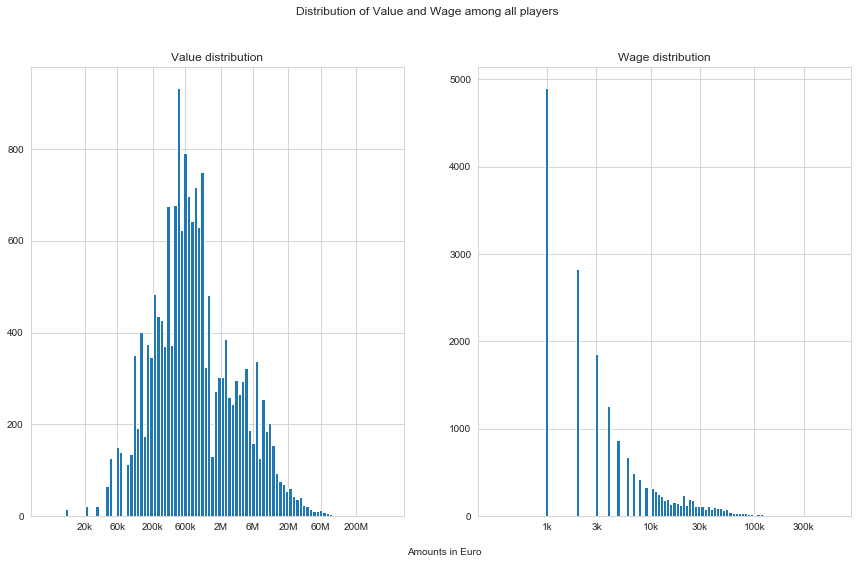

In [13]:
## Use log Value and Wage columns to perform a hist, as original values have a very long tail and highly skewed
plt.figure(figsize=[14.70, 8.27])
plt.suptitle('Distribution of Value and Wage among all players')
plt.figtext(0.48, 0.06,'Amounts in Euro')
plt.subplot(1, 2, 1)
bins= np.arange(2.5, df.log_Value.max() + 0.05, 0.05)
ticks= log_trans(np.array([2e4,6e4, 2e5,6e5,2e6,6e6,2e7, 6e7,2e8]))
labels= ['20k','60k','200k','600k','2M','6M','20M','60M','200M']
plt.hist(data= df, x= 'log_Value',bins= bins);
plt.xlim([3.5,9])
plt.xticks(ticks, labels);
plt.title('Value distribution')


plt.subplot(1, 2, 2)
ticks= log_trans(np.array([1000, 3000, 10000, 30000, 100000, 300000]))
labels= ['1k', '3k', '10k', '30k', '100k', '300k']
bins= np.arange(2.5, df.log_Wage.max() + 0.03, 0.03)
plt.hist(data= df, x= 'log_Wage', bins= bins);
plt.xticks(ticks, labels);
plt.title('Wage distribution');


### The above two graphs shows the distribution of players' Values and Wages.
> Distribution of the original values returns  highly skewed long tailed graphs with most values on the low end. So I use the log values for the graphs.

> Distribution of log Values is normal with most values between 200k and  2M with a drop and a jump right before the 2M mark.

> Distribution of log Wages is right skewed with spikes on the left side of the graph and a decreasing tail on the right.

In [14]:
## list top 10 clubs according to Sum of Value of team palyers
top_clubs= df.groupby(['Club']).sum()['Value'].sort_values(ascending= False).head(10).index
clbs = df[df.Club.isin(top_clubs)]

''

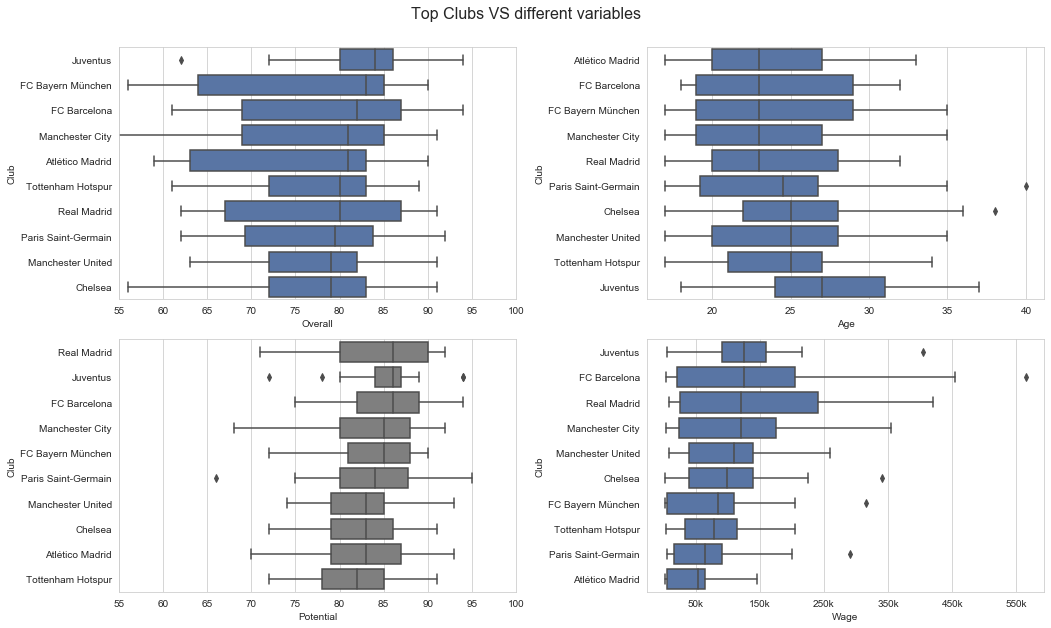

In [15]:
fig, axes = plt.subplots(2, 2,figsize=[14.70, 8.27]) 
fig.suptitle('Top Clubs VS different variables', fontsize=16,y= 1.05 )
axes = axes.flatten() 
plt.sca(axes[0])
sns.boxplot(clbs.Overall, clbs.Club, color= base_clr
            , order= clbs.groupby(['Club']).median()['Overall'].sort_values(ascending= False).index);
plt.xlim(55,100);

plt.sca(axes[2])
sns.boxplot(clbs.Potential, clbs.Club, color= sns.color_palette()[7],
            order= clbs.groupby(['Club']).median()['Potential'].sort_values(ascending= False).index);
plt.xlim(55,100);

plt.sca(axes[1])
sns.boxplot(clbs.Age, clbs.Club, color= base_clr,order= clbs.groupby(['Club']).median()['Age'].sort_values().index)
;

plt.sca(axes[3])
sns.boxplot(clbs.Wage, clbs.Club, color= base_clr,order= clbs.groupby(['Club']).median()['Wage'].sort_values(ascending= False).index)
ticks=[5e4, 15e4, 25e4, 35e4, 45e4, 55e4]
labels= ['50k', '150k', '250k', '350k', '450k', '550k']
plt.xticks(ticks, labels)

plt.tight_layout()
;

### The above graphs shows the relationships between Potential, Overall ,  Age and Wage VS top clubs.
### Top 10 clubs are defined by the sum of value of their players.
> We observe that when speaking about Potential in comparison to  Overall  , all teams seem to improve with players' scores are spread out over smaller range.

> Juventus is an interesting case, the team's Overall, Potential and Wage values are distributed over the smallest range, which indicates that the club is very specific regarding choosing its players, and is trying to maintain equal Wage for its players, but it has the highest age range which means that the current team's Overall is going to decline faster over time.

> We observe some interesting changes in terms of teams order, as Real Madrid jumps to top place according to potential, compared to holding seventh place according to Overall.

> As a general rule by taking the third graph into account, most of the younger teams jump in order when transitioning from viewing Overall to Potential.

> In the fourth graph, 50% of top clubs' players earn 50K or more, with most players sit between the 50K and 150K marks.

> Half the teams have an outlier on the higher side, that is the player who is considered the club's star.

In [16]:
# Create a dataframe with only top 10 countries based on value counts
top_counties= df.groupby(['Nationality']).count().sort_values(by=['ID'], ascending= False).head(10).index
cntrs = df[df.Nationality.isin(top_counties)].copy()

In [17]:
stats= ['Defending','Dribble','Mental','Passing','Mobility',
        'Power','Shooting','GK']

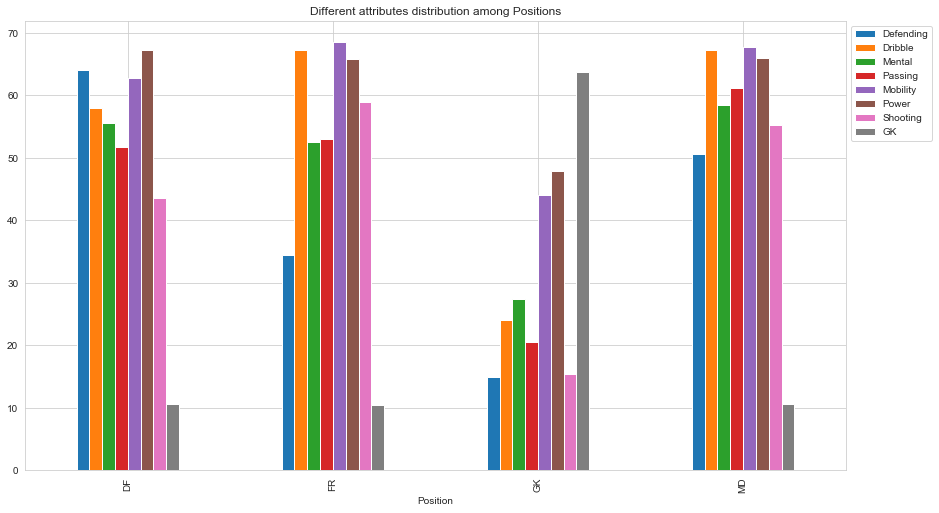

In [18]:
# create a dataframe including only Position and various players' attributes for easier plotting
df_stats= df.groupby(['Position']).mean()[stats]

df_stats.plot(kind= 'bar', figsize=[14.70, 8.27]);
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Different attributes distribution among Positions');

### The above graph shows the distribution of various players' stats VS Position
> One observation is that two of the most important attributes for a player in any position is Power and Mobility

> Another observation is that Midfield players tend to be the most well rounded of all positions , with each other position being special in a specific attribute

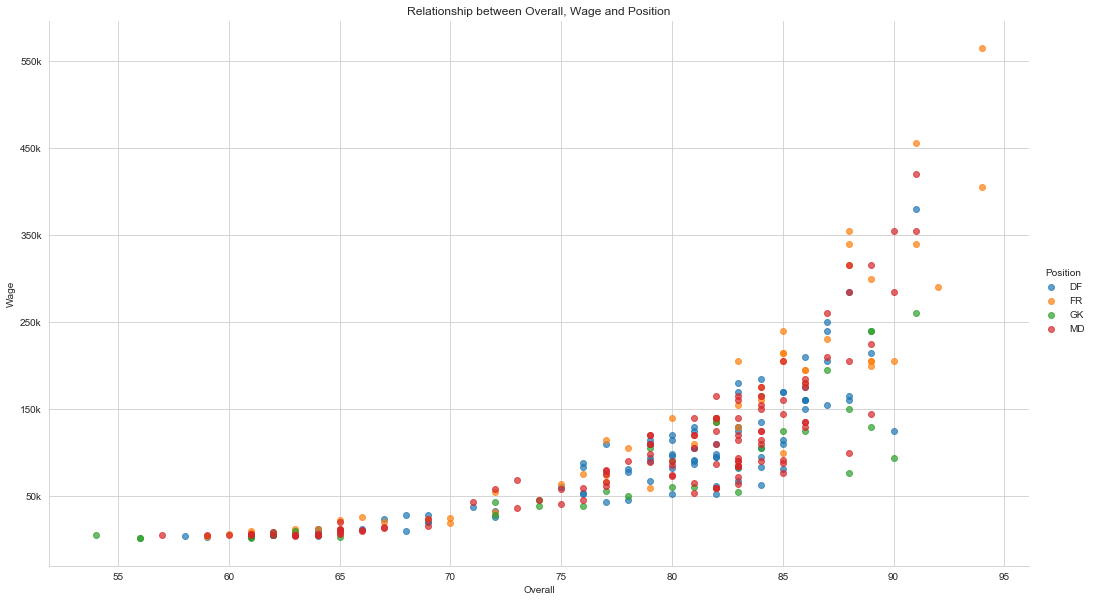

In [19]:


ticks= log_trans(np.array([2e4,6e4, 2e5,6e5,2e6,6e6,2e7, 6e7,2e8]))
labels= ['20k','60k','200k','600k','2M','6M','20M','60M','200M']
g= sns.FacetGrid(data= clbs, hue= 'Position', height = 8.27,  aspect = 14.70/8.27);
g.map(plt.scatter, 'Overall', 'Wage', alpha= 0.7);
ticks=[5e4, 15e4, 25e4, 35e4, 45e4, 55e4]
labels= ['50k', '150k', '250k', '350k', '450k', '550k']
plt.yticks(ticks, labels)
g.add_legend();
plt.title('Relationship between Overall, Wage and Position');


### The above graph shows the relationship between Overall VS Wage, with Position added as a third element
> We notice that Overall VS Wage have a positive exponential relationship, as higher rated players tend to get paid far more than lower rated ones

> Another observation that all players who get paid more than 250K except one, are either midfielders or forwards.

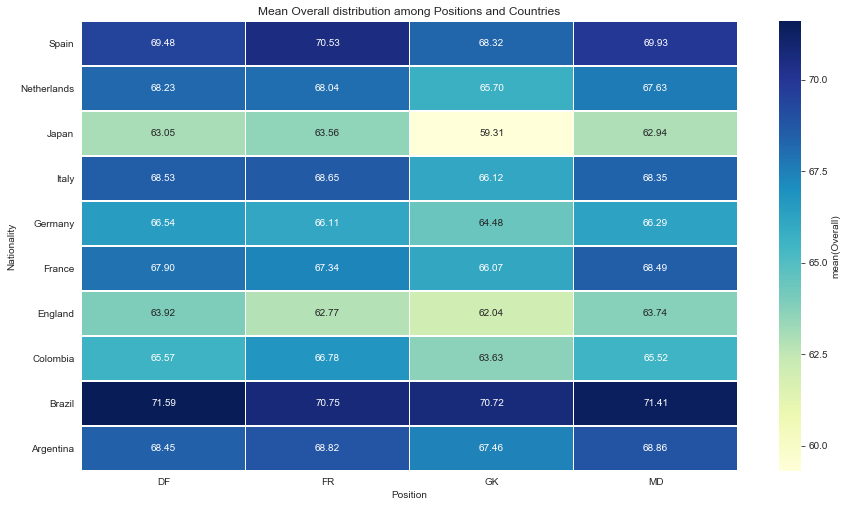

In [20]:
plt.figure(figsize=[14.70, 8.27])
cat_means = cntrs.groupby(['Nationality', 'Position']).mean()['Overall']
cat_means = cat_means.reset_index(name = 'Overall_avg')
cat_means = cat_means.pivot(index = 'Nationality', columns = 'Position',
                            values = 'Overall_avg')
g= sns.heatmap(cat_means, annot = True, fmt = '.2f',cmap= 'YlGnBu'
           ,linewidths=.5, cbar_kws = {'label' : 'mean(Overall)'});
g.set(ylim= (0,10));
plt.title('Mean Overall distribution among Positions and Countries');

### The above graph the average Overall per position and country

> The graph explains why Brazilian players are the most valued as they top the average Potential for each position, with Spain and Argentina coming in second and third place respectively.

> When looking at the relationship between Overall and Wage, and adding Position to the mix, I was able to identify which types of players tend to get paid more

> It is intuitive that players with higher Overall are paid more, but the gap in Wage between high Overall rated and low Overall rated players is very surprising

> It is intuitive that players with higher Overall are paid more, but the gap in Wage between high Overall rated and low Overall rated players is very surprising

> It is also interesting that England - which has the most players - has the second worst Overall averages over all positions.

# Thank you!